# Repopulation Paris

## First Look into Bottin Data

In [29]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt


In [3]:
bottins = pd.read_csv("data/strict_addressing.csv")

In [4]:
print("size of table:", bottins.shape)
bottins.head(50)

size of table: (4406164, 8)


,Unnamed: 0,page,row,Nom,Métier,Rue,Numéro,annee
0,bpt6k6282019m,144,0,Aaron,bronzes,passage Choiseal,72 et 74.,1855
1,bpt6k6282019m,144,1,Aaron (Mic.),manuf. de porcelaines,Bondy,30.,1855
2,bpt6k6282019m,144,3,Abadie,architecte,Provence,7.,1855
3,bpt6k6282019m,144,5,Abadie,tabac et estamin.,Ménilmontant,158.,1855
4,bpt6k6282019m,144,6,Abanse,instituteur,Sts-Pères,30.,1855
5,bpt6k6282019m,144,7,Abat,rentier,Isly,10.,1855
6,bpt6k6282019m,144,13,Abault et Coudray,charpentiers,Corbeau,23.,1855
7,bpt6k6282019m,144,14,Abault (Paul),libraire,quai des Angustins,9.,1855
8,bpt6k6282019m,144,15,Abavid,vins,Beaujolais-da-Temple,7.,1855
9,bpt6k6282019m,144,16,Abazaer (Are),cristaux et porcelaines,Pei.Ecuries,26.,1855


In [5]:
print("number of streets in dataset:", len(bottins["Rue"].unique()))

number of streets in dataset: 195464


In [6]:
bottins_original = bottins.copy()

## Paris Opendata - Voies

In [7]:
voies = pd.read_csv("data/opendata_voie_paris.csv", sep=";")

In [8]:
print("number of voies:", len(voies))
voies.head()

number of voies: 6542


,N_SQ_VO,C_COINSEE,C_DESI,C_LIAISON,L_VOIE,L_COURTMIN,L_LONGMIN,C_VOIE,B_FANTOIR,B_OFF,C_VOIE_VP,Geometry,OBJECTID,C_DOMOFF,N_SQ_CO,LENGTH,Geometry X Y
0,750004016,75056,IMP,NaN,BAUDRAN,Imp. Baudran,Impasse Baudran,750560733,O,O,0717,"{""coordinates"": [[2.3554518641916804, 48.82415...",6,O,750001537,64.625200,"48.82415332715383,2.3558919735528483"
1,750003821,75056,IMP,DES,CHEVALIERS,Imp. des Chevaliers,Impasse des Chevaliers,750561994,O,O,1986,"{""coordinates"": [[2.3960916096233094, 48.87258...",59,P,750001537,77.423197,"48.87229377669366,2.3963259349268453"
2,750005946,75056,RUE,DES,BONS VIVANTS,R. des Bons Vivants,Rue des Bons Vivants,750561106,O,O,1111,"{""coordinates"": [[2.346752283163513, 48.862212...",112,P,750001537,39.406151,"48.862044141078364,2.34682583693024"
3,750001312,75056,RUE,NaN,JEAN HUGUES,R. Jean Hugues,Rue Jean Hugues,750564899,O,O,4806,"{""coordinates"": [[2.274705254077503, 48.868429...",170,O,750001537,45.962263,"48.86861817275934,2.2748341164181163"
4,750005774,75056,RUE,NaN,JEAN-JACQUES ROUSSEAU,R. Jean-Jacques Rousseau,Rue Jean-Jacques Rousseau,750564901,O,O,4808,"{""coordinates"": [[[2.3396869374353004, 48.8620...",171,P,750001537,397.842033,"48.86347293952501,2.342392728552715"


In [54]:
voies.loc[:,4].unique()

KeyError: 4

In [48]:
#keep only columns that might be useful further on
voies = voies[["N_SQ_VO", "L_VOIE", "L_COURTMIN", "L_LONGMIN", "Geometry", "LENGTH", "Geometry X Y"]]


'{"coordinates": [[2.3960916096233094, 48.87258679061505], [2.3961639263405856, 48.87255978330588], [2.3965317454805097, 48.871965988336754]], "type": "LineString"}'

In [49]:

voies.head().iloc[1,4]
type(voies.head().iloc[1,4])

str

<AxesSubplot:>

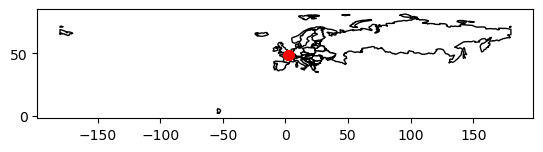

In [10]:
voies[["Lat","Long"]] = voies.loc[:,"Geometry X Y"].str.split(',', expand=True)
voies = gpd.GeoDataFrame(voies, geometry=gpd.points_from_xy(
    voies.Long, voies.Lat), crs="EPSG:3857")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black')

voies.plot(ax=ax, color='red')


In [11]:
print(voies.crs)

EPSG:3857


In [51]:
points = gpd.points_from_xy(voies.Long, voies.Lat, crs="EPSG:4326")
map = gpd.GeoDataFrame(voies, geometry=points)
#map = map.to_crs(epsg=3857)
ax = map.plot(figsize=(40,40), alpha = 1.0, edgecolor = "blue")
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron, crs=map.crs.to_string())

AttributeError: 'DataFrame' object has no attribute 'Long'

c:\Users\Ben\miniconda3\envs\paris\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


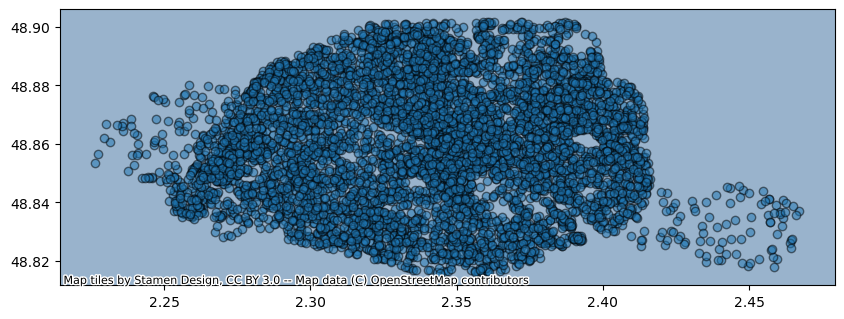

In [27]:
voies_wm = voies.to_crs(epsg=3857)
ax = voies_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)


In [9]:
# prepare data for alignment
bottins["Rue"] = bottins["Rue"].str.lower()
voies["L_VOIE"] = voies["L_VOIE"].str.lower()
voies["L_COURTMIN"] = voies["L_COURTMIN"].str.lower()
voies["L_LONGMIN"] = voies["L_LONGMIN"].str.lower()

In [10]:
bot_voies_algn1 = bottins.join(voies.set_index("L_LONGMIN"), on="Rue")
bot_voies_algn2 = bottins.join(voies.set_index("L_VOIE"), on="Rue")
bot_voies_algn3 = bottins.join(voies.set_index("L_COURTMIN"), on="Rue")

In [11]:
# see how many streets were aligned
print(bot_voies_algn1["Geometry"].isna().sum())
print(bot_voies_algn2["Geometry"].isna().sum())
print(bot_voies_algn3["Geometry"].isna().sum())

4228735
3191199
3793594


In [14]:
# start with 2nd dataframe as basis, split into aligned an not aligned data
aligned = bot_voies_algn2.loc[bot_voies_algn2["Geometry"].notna()]
not_aligned = bot_voies_algn2.loc[bot_voies_algn2["Geometry"].isna()]
not_aligned = not_aligned.drop(["N_SQ_VO", "L_COURTMIN", "L_LONGMIN", "Geometry", "LENGTH", "Geometry X Y"], axis=1)
print("aligned:", len(aligned), "not aligned:", len(not_aligned))

aligned: 1933426 not aligned: 3191199


In [15]:
# perform join with "L_COURTMIN on not_aligned dataframe"
x = not_aligned.join(voies.set_index("L_COURTMIN"), on="Rue")
aligned = aligned.append(x[x["Geometry"].notna()], ignore_index = True)
not_aligned = x[x["Geometry"].isna()]
not_aligned = not_aligned.drop(["N_SQ_VO", "L_LONGMIN", "L_VOIE", "Geometry", "LENGTH", "Geometry X Y"], axis=1)
print("aligned:", len(aligned), "not aligned:", len(not_aligned))

aligned: 2545967 not aligned: 2578666


In [16]:
# perform join with "L_LONGMIN on not_aligned dataframe"
x = not_aligned.join(voies.set_index("L_LONGMIN"), on="Rue")
aligned = aligned.append(x[x["Geometry"].notna()], ignore_index = True)
not_aligned = x[x["Geometry"].isna()]
print("aligned:", len(aligned), "not aligned:", len(not_aligned))

aligned: 2713723 not aligned: 2410910


In [17]:
not_aligned.tail()

,Unnamed: 0,page,row,Nom,Métier,Rue,Numéro,annee,N_SQ_VO,L_VOIE,L_COURTMIN,Geometry,LENGTH,Geometry X Y
4406148,bpt6k9780089g,1607,235,Zvang,blanchiss.,r. jules-vallès,5.,1922,NaN,NaN,NaN,NaN,NaN,NaN
4406153,bpt6k9780089g,1607,246,Zweiger (Vve),vins-restaur.,r. des hospitalières-st-gervais,12.,1922,NaN,NaN,NaN,NaN,NaN,NaN
4406156,bpt6k9780089g,1607,252,Zwilling,déchets de cuir,r. de buffon,67.,1922,NaN,NaN,NaN,NaN,NaN,NaN
4406157,bpt6k9780089g,1607,254,Zwinger (Henri),agent de fabriques,faub. poissonnière,65.,1922,NaN,NaN,NaN,NaN,NaN,NaN
4406162,bpt6k9780089g,1607,263,Zyssmann,bar,r. de pivoli,40.,1922,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Count how many addresses were aligned per year
annee_aligned = aligned.groupby(by=["annee"]).count()[["Nom"]]
annee_not_aligned = not_aligned.groupby(by=["annee"]).count()[["Nom"]]
df_per_year = annee_aligned.join(annee_not_aligned, lsuffix='_aligned', rsuffix='_not_aligned')

In [19]:
# Calculate the ratio of aligned addresses
df_per_year["ratio_aligned"] = df_per_year["Nom_aligned"] / (df_per_year["Nom_aligned"]+df_per_year["Nom_not_aligned"])
df_per_year

,Nom_aligned,Nom_not_aligned,ratio_aligned
annee,,,
1839,17685,25795,0.406739
1841,21159,29352,0.418899
1842,22031,30303,0.420969
1843,18823,26673,0.413729
1844,21385,28703,0.426949
1845,22232,29422,0.430402
1846,23083,30404,0.431563
1847,23829,32053,0.426416
1848,26562,34287,0.436523


In [28]:
aligned.tail()

,Unnamed: 0,page,row,Nom,Métier,Rue,Numéro,annee,N_SQ_VO,L_COURTMIN,L_LONGMIN,Geometry,LENGTH,Geometry X Y,L_VOIE
2713718,bpt6k9780089g,1603,137,Woog (H.),courtier en march.,square la bruyère,2. (90). T. Trud. 12. 99.,1922,750004615.0,sq. la bruyère,NaN,"{""coordinates"": [[2.333247399796023, 48.879067...",49.933780,"48.87912453518579,2.332918048991286",la bruyere
2713719,bpt6k9780089g,1604,273,Yseux,relieur,quai de conti,7.,1922,750004871.0,qu. de conti,NaN,"{""coordinates"": [[[2.3404337067044763, 48.8560...",337.957721,"48.856973688745086,2.3388802711013708",conti
2713720,bpt6k9780089g,1604,305,Yver,boucher en gros,quai de l'oise,41.,1922,750005209.0,qu. de l'oise,NaN,"{""coordinates"": [[[2.379696366149043, 48.88877...",732.327618,"48.89065442303185,2.38319691672075",oise
2713721,bpt6k9780089g,1605,47,Yvoré,vétérinaire et maréchal-ferrant,quai de jemmapes,112.,1922,750003292.0,qu. de jemmapes,NaN,"{""coordinates"": [[[2.367392608119634, 48.86876...",1922.227007,"48.876028316605066,2.3665121066795267",jemmapes
2713722,bpt6k9780089g,1605,106,Zadok (Dr),médecin,square moncey,3.,1922,750004558.0,sq. moncey,NaN,"{""coordinates"": [[[2.3306447263897896, 48.8800...",143.281994,"48.88052926002643,2.3305025235547654",moncey


In [27]:
aligned["Rue"]

0                   provence
1                   provence
2                       isly
3                castiglione
4                     temple
                 ...        
2713718    square la bruyère
2713719        quai de conti
2713720       quai de l'oise
2713721     quai de jemmapes
2713722        square moncey
Name: Rue, Length: 2713723, dtype: object

In [33]:
from Levenshtein import distance as lev

## Paris Opendata - Adresses

In [31]:
adresses = pd.read_csv("data/opendata_adresse_paris.csv", sep=";")

In [21]:
adresses.head()
# N_SQ_VO same as with voies! 

,Geometry X Y,Geometry,N_SQ_AD,N_VOIE,C_SUF1,C_SUF2,C_SUF3,C_AR,A_NVOIE,B_ANGLE,B_OFFSTDF,B_AFFSTDF,B_HORS75,L_NVOIE,L_ADR,N_SQ_AR,N_SQ_VO,OBJECTID
0,"48.868149964330925,2.385363237327124","{""coordinates"": [2.385363237327124, 48.8681499...",750088825,31.0,NaN,NaN,NaN,20.0,21.0,N,O,NaN,N,31,31 RUE ETIENNE DOLET,750000020.0,750003581.0,48975
1,"48.873918224142145,2.308770442174867","{""coordinates"": [2.308770442174867, 48.8739182...",750038510,2.0,NaN,NaN,NaN,8.0,222.0,O,O,NaN,N,2,2 RUE PAUL CEZANNE,750000008.0,750004449.0,48990
2,"48.84631684220949,2.34848334292492","{""coordinates"": [2.34848334292492, 48.84631684...",750162012,14.0,NaN,NaN,NaN,5.0,346.0,N,O,NaN,N,14,14 RUE CLOVIS,750000005.0,750004930.0,49022
3,"48.850519497345935,2.3857899214565674","{""coordinates"": [2.3857899214565674, 48.850519...",750054032,31.0,b,NaN,NaN,11.0,359.0,N,O,NaN,N,31b,31b RUE DE MONTREUIL,750000011.0,750003059.0,49026
4,"48.85233571571768,2.2684341614185204","{""coordinates"": [2.2684341614185204, 48.852335...",750128612,47.0,NaN,NaN,NaN,16.0,124.0,O,O,NaN,N,47,47 RUE RIBERA,750000016.0,750000897.0,49033


In [22]:
adresses[["Numéro", "Rue"]] = adresses["L_ADR"].str.split(" ", 1, expand=True)
adresses["Rue"] = adresses["Rue"].str.lower()
adresses.head()

,Geometry X Y,Geometry,N_SQ_AD,N_VOIE,C_SUF1,C_SUF2,C_SUF3,C_AR,A_NVOIE,B_ANGLE,B_OFFSTDF,B_AFFSTDF,B_HORS75,L_NVOIE,L_ADR,N_SQ_AR,N_SQ_VO,OBJECTID,Numéro,Rue
0,"48.868149964330925,2.385363237327124","{""coordinates"": [2.385363237327124, 48.8681499...",750088825,31.0,NaN,NaN,NaN,20.0,21.0,N,O,NaN,N,31,31 RUE ETIENNE DOLET,750000020.0,750003581.0,48975,31,rue etienne dolet
1,"48.873918224142145,2.308770442174867","{""coordinates"": [2.308770442174867, 48.8739182...",750038510,2.0,NaN,NaN,NaN,8.0,222.0,O,O,NaN,N,2,2 RUE PAUL CEZANNE,750000008.0,750004449.0,48990,2,rue paul cezanne
2,"48.84631684220949,2.34848334292492","{""coordinates"": [2.34848334292492, 48.84631684...",750162012,14.0,NaN,NaN,NaN,5.0,346.0,N,O,NaN,N,14,14 RUE CLOVIS,750000005.0,750004930.0,49022,14,rue clovis
3,"48.850519497345935,2.3857899214565674","{""coordinates"": [2.3857899214565674, 48.850519...",750054032,31.0,b,NaN,NaN,11.0,359.0,N,O,NaN,N,31b,31b RUE DE MONTREUIL,750000011.0,750003059.0,49026,31b,rue de montreuil
4,"48.85233571571768,2.2684341614185204","{""coordinates"": [2.2684341614185204, 48.852335...",750128612,47.0,NaN,NaN,NaN,16.0,124.0,O,O,NaN,N,47,47 RUE RIBERA,750000016.0,750000897.0,49033,47,rue ribera
